In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pmdarima.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (15,7)

c:\users\attila_sajo\miniconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Data

In [2]:
import pmdarima as pm
# Load/split your data
y = pm.datasets.load_wineind()

train, test = train_test_split(y, train_size=150)

# SARIMA

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train, order=(2,1,1), seasonal_order=(2,0,0,12))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  150
Model:             ARIMA(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1418.496
Date:                           Mon, 04 Apr 2022   AIC                           2848.992
Time:                                   10:27:49   BIC                           2867.016
Sample:                                        0   HQIC                          2856.315
                                           - 150                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0339      0.079     -0.430      0.667      -0.188       0.121
ar.L2         -0.2113      0.094     -2.247

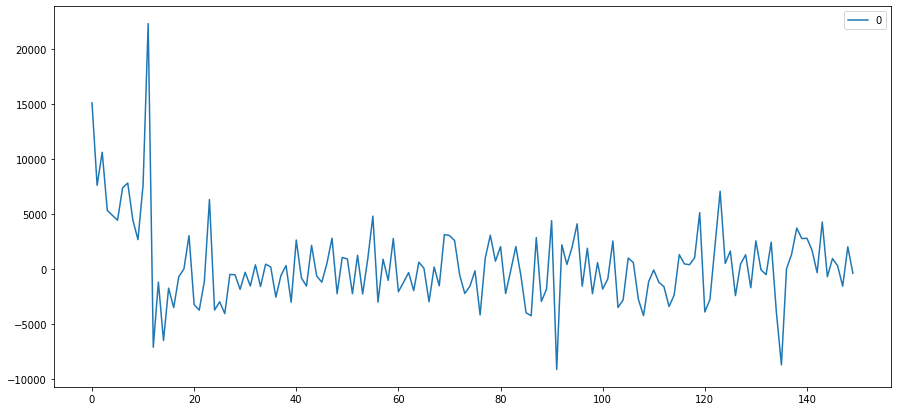

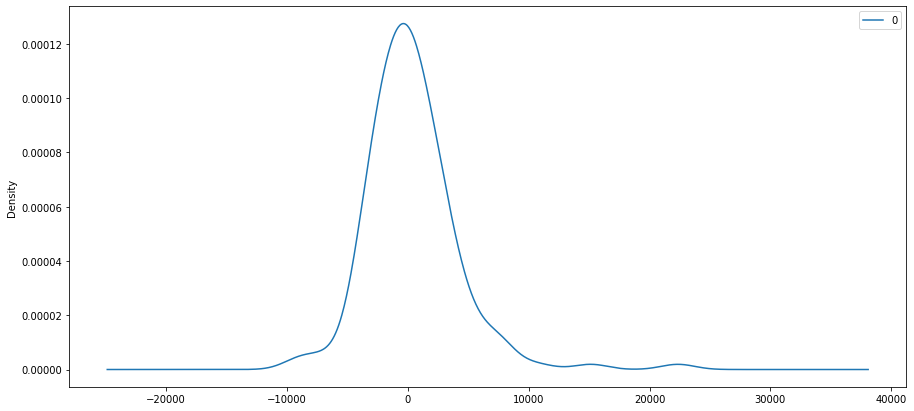

In [4]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# Auto SARIMA

In [5]:
import statsmodels.api as sm
auto_cor = sm.tsa.acf(train)
# kidobjuk az első értéket mivel az mindig a legmagasabb 
auto_cor = auto_cor[1:]
# hozáadunk 1-et az kidobot első elem miatt 
m = (np.where(auto_cor == np.amax(auto_cor))[0]+1)[0]
print(m)

12


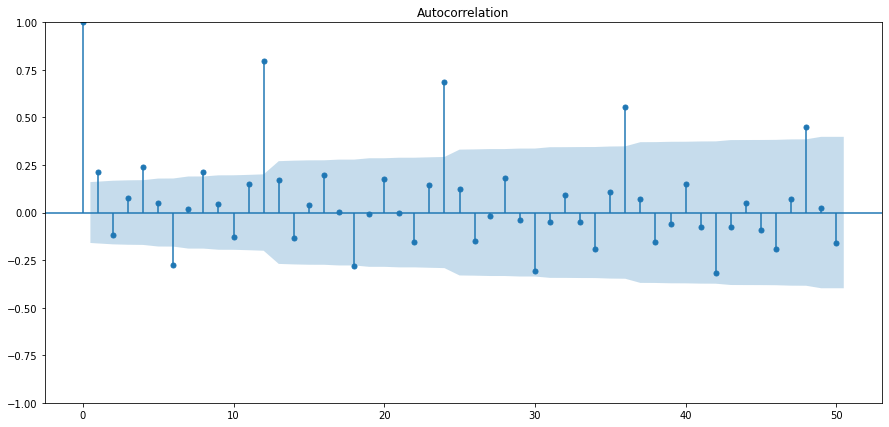

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(train, lags=50)
# Show the AR as a plot
plt.show()

In [7]:
# Model illesztése
#   m -- ezt tudni kell 
modell = pm.auto_arima(train, error_action="ignore", suppress_warnings=True, trace=True, seasonal=True, m=12)

# Előrejelzés
elorejezes, konv_int  = modell.predict(test.shape[0], return_conf_int= True, alpha=0.01)  # predict N steps into the future



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2895.934, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2917.891, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3039.240, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2890.929, Time=0.46 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2892.498, Time=0.97 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2890.523, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2981.524, Time=0.04 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2892.534, Time=0.65 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2931.096, Time=0.62 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2906.713, Time=0.26 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

In [8]:
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  150
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1418.496
Date:                             Mon, 04 Apr 2022   AIC                           2848.992
Time:                                     10:29:36   BIC                           2867.016
Sample:                                          0   HQIC                          2856.315
                                             - 150                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0339      0.079     -0.430      0.667      -0.188       0.121
ar.L2         -0.2113      0.094     -2.247      0.025      -0.396      -0.027
ma.L1         -0.8622      0.017    -50.286      0.000      -0.896      -0.829
ar.S.L12       0.5046      0.043     11.845      0.000       0.421       0.588
ar.S.L24       0.3312      0.060      5.502      0.000       0.213       0.449
sigma2      9.568e+06   2.26e-09   4.23e+15      0.000    9.57e+06    9.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               461.74
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.29
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+31. Standard errors may be unstable.
"""

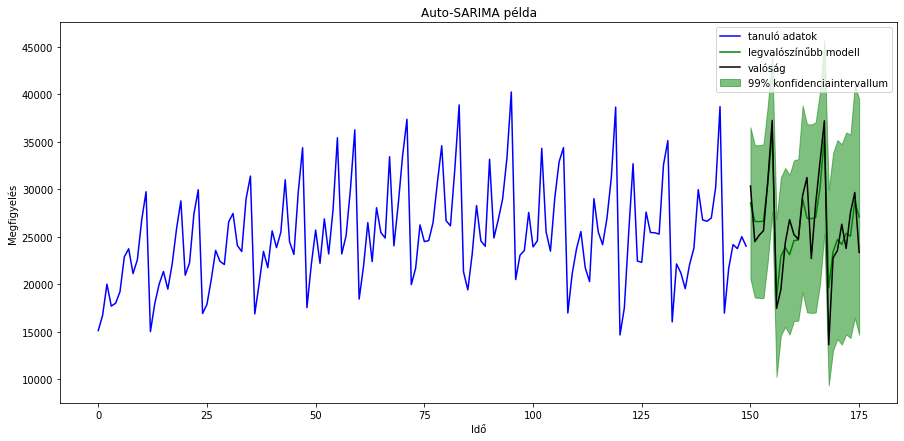

In [10]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue', label="tanuló adatok")
plt.plot(x[150:], elorejezes, c='green', label="legvalószínűbb modell")
plt.fill_between(
    x[150:],
    konv_int[:,0],
    konv_int[:,1],
    alpha=0.5,
    color="green",
    label="99% konfidenciaintervallum"
                )
plt.plot(x[150:], test, c="black", label="valóság")
plt.legend()
plt.xlabel("Idő")
plt.ylabel("Megfigyelés")
plt.title("Auto-SARIMA példa")
plt.show()

# Grid search

In [11]:
import itertools
import warnings
warnings.filterwarnings("ignore")

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal
                    
                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except Exception as e:
                print(e)
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
    
sarima_grid_search(train, m)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3452.462140939295
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3091.03084348673
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:2804.4142056174346
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2555.922451650772
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2332.0466920923623
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2112.2874273215266
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:2453.4107873394214
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:2178.095674842785
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:1932.7280277715038
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2574.027512686272
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2558.5044646176634
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:2325.92696281151
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2344.900672750571
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2326.51166866795
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:2107.0475513236047
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:2178.7546627099996
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:2161.055531009037
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:1935.569773717049
SARIMA(0, 0, 0)x(2, 0, 

SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:2114.393886622842
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:1888.1635834428312
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:2324.7730567952426
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:2430.558121713074
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:2268.036808132522
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:2111.955137879873
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:2110.8892024317406
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:2058.3751805399706
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:1941.908477887065
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:1945.4667904098526
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:1899.8814791175332
SARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:3148.023031671025
SARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:2836.586994657976
SARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:2569.623348716305
SARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:2725.6911616932557
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:2485.8479760395785
SARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:2255.2723808404317
SARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:2598.3452718684252
SARIMA(0, 2, 0)x(0

SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:2068.478573452788
SARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:2413.9185988545323
SARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:2136.9556039188933
SARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:1897.0864941651944
SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:2557.199793729287
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:2620.2400029890778
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:2389.868571748896
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:2323.0925676081197
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:2282.1603389353813
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:2069.6825072171087
SARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:2174.5906602049463
SARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:2124.562161446341
SARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:1910.6045962064375
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:2399.788202353179
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:2327.2266024111364
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:2391.4050086673988
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:2104.760328113695
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:2105.794070601778
SARIMA(1, 0, 2)x(

SARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:2130.9739531467626
SARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:2131.077422813989
SARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:2114.19091722551
SARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:1972.7576041624968
SARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:1919.7766170881696
SARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:1946.8125335365885
SARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:2947.9708539769495
SARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:2669.0383978825757
SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:2423.607188796492
SARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:2537.483771550824
SARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:2272.820778884894
SARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:2051.582393231193
SARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:2423.699032514799
SARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:2138.9801699962327
SARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:1901.0472621582705
SARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:2696.9532909682684
SARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:2654.9323389636
SARIMA(1, 2, 2)x(1, 0, 2, 12) - AIC:2414.712272267126
SARIMA(1, 2, 2)x(1, 1,

SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:2509.4484584684237
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:2280.454034970988
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:2287.799647566985
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:2287.069210951279
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:2071.220947992147
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:2135.143460592834
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:2093.5581510779675
SARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:1871.2991416202938
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:2279.899702418582
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:2281.2021161276025
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:2329.0548483747307
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:2070.998912382648
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:2070.7155845641755
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:2072.5476274777375
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:1896.585752646266
SARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:1871.2340121648167
SARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:1872.9256770041102
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2907.3893509019636
SARIMA(2, 1, 2)x(0

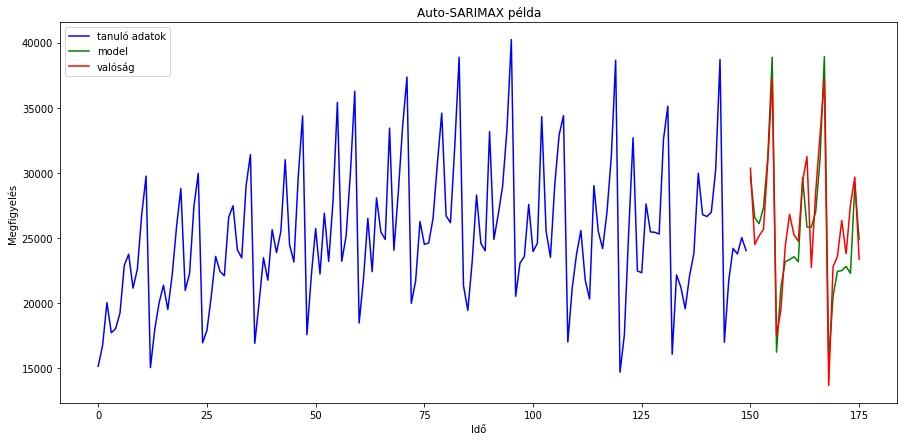

In [12]:
# előrejelzés
model = sm.tsa.statespace.SARIMAX(train,
                          order=(1, 1, 2),
                          seasonal_order=(0, 2, 2, 12),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(start=len(train), end=len(y)-1)
# ábra
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue', label="tanuló adatok")
plt.plot(x[150:], yhat, c='green', label="model")
plt.plot(x[150:], test, c="red", label="valóság")
plt.legend()
plt.xlabel("Idő")
plt.ylabel("Megfigyelés")
plt.title("Auto-SARIMAX példa")
plt.show()

# SARIMAX

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax = SARIMAX(y,
                  order=(2,1,1),seasonal_order=(2,0,0,12),
                  exog = y,
                  enforce_stationarity=False, enforce_invertibility=False).fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  176
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood                1578.028
Date:                             Mon, 04 Apr 2022   AIC                          -3142.056
Time:                                     10:39:34   BIC                          -3121.029
Sample:                                          0   HQIC                         -3133.513
                                             - 176                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.001    739.027      0.000       0.997       1.003
ar.L1          0.1943    5.6e-10   3.47e+08      0.000       0.194       0.194
ar.L2         -0.2624   1.45e-09  -1.81e+08      0.000      -0.262      -0.262
ma.L1         -0.7846   8.42e-08  -9.31e+06      0.000      -0.785      -0.785
ar.S.L12       0.6251   8.17e-19   7.65e+17      0.000       0.625       0.625
ar.S.L24       0.2684   3.92e-09   6.85e+07      0.000       0.268       0.268
sigma2          1e-10   1.71e-10      0.583      0.560   -2.36e-10    4.36e-10
===================================================================================
Ljung-Box (L1) (Q):                   6.58   Jarque-Bera (JB):                75.13
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.62
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+45. Standard errors may be unstable.
"""

In [14]:
SARIMAX(y, order=(2,1,1),seasonal_order=(2,0,0,12)).loglike([1,0,0,2,3,0,12])

0.0

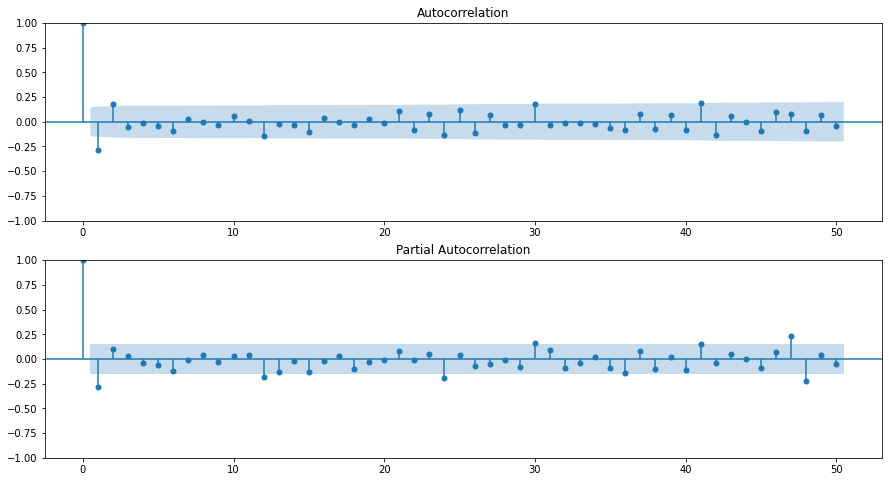

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
res = sarimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = plot_acf(res, lags=50, ax=ax[0])
fig = plot_pacf(res, lags=50, ax=ax[1])
plt.show()